## Verteilungen
Statistische Verteilungen: Beispiele, Numpy Funktionen, Anwendungen
*"neues" Packet* scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Um die Verteilungsfunktionen zu berechnen nutzen wir ein weiteres python packet aus der scipy Bibliothek

In [2]:
import scipy, scipy.stats

Um die Normalverteilung zu plotten wollen wir die Wahrscheinlichkeitsdichtefunktion (probability density function, pdf) an verschiedenen Stellen auswerten und mit *pyplot* plotten. 

Mit Hilfe von der scipy Funktion linespace erstelle ich mir eine Liste an Werten. Diese nutze ich als Werte auf der x-Achse, an denen ich die *pdf* auswerten will. 

*Elegante Lösung*: Zur Darstellung der Wahrscheinlichkeitsdichtefunktion werte ich die Funktion an bestimmten x-Werten aus. Diese könnte ich einfach definieren, aber im Zweifel weiß ich nicht wo auf der x-Achse der relevante Teil der Wahrscheinlichkeitsdichtefunktion liegt.
Um dieses Problem elegant zu umgehen, kann ich die *ppf* (Percent point function) nutzen. Diese ist die Umkehrfunktion der *cdf* (comulative density function). Wenn ich diese am "Anfang" (also bei 1% der Dichte) und am "Ende" (also bei 99% der Dichte) auswerte, bekomme ich die Intervallgrenzen innerhalb derer sich fast alles abspielt. Ich muss also kein geeignetes Interval suchen!

In [3]:
lower = scipy.stats.norm.ppf(0.01,0,1)
upper = scipy.stats.norm.ppf(0.99,0,1)
x = scipy.linspace(lower,upper,100)

Dann berechne ich die pdf an den in **x** gespeicherten Stellen wie folgt

In [4]:
y = scipy.stats.norm.pdf(x,0,1)

Und plotte die Werte

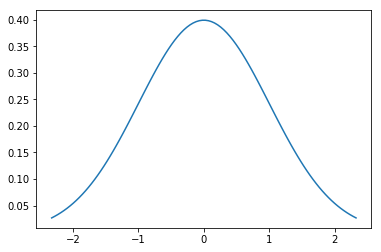

In [5]:
plt.plot(x,y)

Wenn ich Werte einer Zufallsvariablen die einer Bestimmten Verteilung folgt ziehen will, kann ich das einfach mit *numpy* machen:

In [6]:
np.random.normal(0,1,10)

array([-1.08277508, -0.68510944, -0.26282829, -0.15313221,  0.26524873,
        0.47733862, -0.44196427, -1.51571798,  0.45101824, -1.4572424 ])

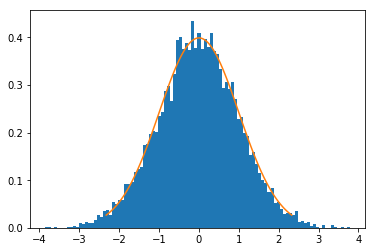

In [7]:
n = 10000 # mit steigendem n nähert sich das Histogram an die mathematische Dichtefunktion an
rv = np.random.normal(0,1,n)
plt.hist(rv, 100,density=True)
plt.plot(x, y)
plt.show();

## Würfelexperiment

In [8]:
n = 100
spiele_ergebnis = np.random.randint(1,7,n) # Zahlen 1-6 (Die obere Grenze ist nicht eingeschlossen!!)

Ein Schätzer für den Erwartungswert könnte einfach der Mittelwert der Ergebnisse sein:

In [9]:
spiele_ergebnis.sum()/float(n)

3.64

**Wie wir wissen ist der rechnerische Erwartungswert der zugrunde liegenden diskreten Gleichverteilung ist 3.5. Wird der Schätzer genauer, wenn ich mehr Ziehungen habe?**

Da sowohl die Summe der Ergebnisse und die Zahl n ganzzahlig ist wird Ergebnis automatisch auf eine ganze Zahl gerundet. Mit `float(n)` n zu einer Fließkommazahl, so dass das Ergebnis als Fließkommazahl ausgegeben wird.

## Bernoulliverteilung

Im Falle einer diskreten Verteilung spricht man von einer Massefunktion, deshalb *pmf*

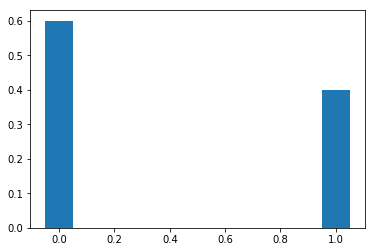

In [10]:
p = 0.4
x = np.array([0.,1.])

plt.bar(x, scipy.stats.bernoulli.pmf(x, p), 0.1);